# Python implementation of Logistic Regression from scratch

_Umberto Michelucci, um@udata.science_

### Abstract

In this notebook I develop a complete version of Logistic Regression from scratch, without using any library (except numpy). I apply the model to a subset of MNIST data containing only the digits 1 and 2 (see the data preparation part to see how to do it) to do binary classification. For the equations and the mathematics behind the python code you can refer (to this notebook)[http://localhost:8888/notebooks/Documents/Data%20Science/Projects/Logistic-Regression-Explained/Logistic%20Regression%20from%20scratch.ipynb#] where I did a complete derivation of the mathematics behind the model. The relevant equations are reported here to make it easier for the reader to follow the code.

**NOTE**: the formulas are not explained or derived and are reported only to help the reader follow the Python code. For a derivation and justification please refer to the notebook above.

## Libraries

In [97]:
import numpy as np
from sklearn.datasets import fetch_mldata

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

from random import *

## Data preparation

To get MNIST data we use the function fetch_mldata, in the datasets package. Let's get all the dataset, and then we will select only the digits we want.

In [98]:
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [99]:
Xinput_,yinput_ = mnist["data"], mnist["target"]

In [100]:
Xinput_.shape

(70000, 784)

In [101]:
yinput_.shape

(70000,)

To know how many digits we have we can run this simple code

In [102]:
total = 0
for i in range(10):
    print ("digit", i, "appear", np.count_nonzero(yinput_ == i), "times")

digit 0 appear 6903 times
digit 1 appear 7877 times
digit 2 appear 6990 times
digit 3 appear 7141 times
digit 4 appear 6824 times
digit 5 appear 6313 times
digit 6 appear 6876 times
digit 7 appear 7293 times
digit 8 appear 6825 times
digit 9 appear 6958 times


In [275]:
total = 0
for i in range(2):
    print ("digit", i, "makes", np.around(np.count_nonzero(yinput_ == i)/70000.0*100.0, decimals=1), "% of the 70000 observations")

digit 0 makes 9.9 % of the 70000 observations
digit 1 makes 11.3 % of the 70000 observations


# k-fold dataset creation

In [103]:
Xinput = Xinput_[np.any([yinput_ == 1,yinput_ == 2], axis = 0)]
yinput = yinput_[np.any([yinput_ == 1,yinput_ == 2], axis = 0)]

In [104]:
yinput = yinput - 1

In [105]:
total = 0
for i in range(0,2,1):
    print ("Label", i, "makes", np.around(np.count_nonzero(yinput == i)/14867.0*100.0, decimals=1), "% of the 14867 observations")

Label 0 makes 53.0 % of the 14867 observations
Label 1 makes 47.0 % of the 14867 observations


We need to remove 3 observations to make the division by 10 (for the folds) easier

In [106]:
Xinput = Xinput[:-7,:]
yinput = yinput[:-7]

In [107]:
(Xinput.shape[0])

14860

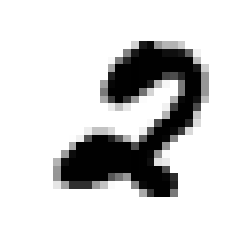

In [108]:
some_digit = Xinput[8999,:]

some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [109]:
foldnumber = 10
idx = np.arange(0,Xinput.shape[0])
np.random.shuffle(idx)
al = np.array_split(idx,foldnumber)

print('Number of folds:',len(al))
print('Number of elements in each fold:',len(al[9]))

Number of folds: 10
Number of elements in each fold: 1486


In [110]:
print(Xinput.shape)
print(yinput.shape)

(14860, 784)
(14860,)


In [111]:
Xinput[al[9],:].shape

(1486, 784)

In [112]:
Xinputfold = []
yinputfold = []
for i in range(foldnumber):
    tmp = Xinput[al[i],:]
    Xinputfold.append(tmp)
    ytmp = yinput[al[i]]
    yinputfold.append(ytmp)

    
Xinputfold = np.asarray(Xinputfold)
yinputfold = np.asarray(yinputfold)

In [113]:
print(Xinputfold.shape)
print(yinputfold.shape)

(10, 1486, 784)
(10, 1486)


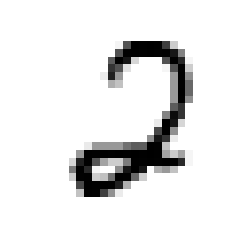

In [114]:
some_digit = Xinputfold[0][1234,:]

some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [115]:
total = 0
for i in range(0,2,1):
    print ("digit", i, "makes", np.around(np.count_nonzero(yinputfold[0] == i)/1486.0*100.0, decimals=1), "% of the 1486 observations")

digit 0 makes 52.2 % of the 1486 observations
digit 1 makes 47.8 % of the 1486 observations


## Data normalization and preparation

In [116]:
Xinputfold_normalized = np.zeros_like(Xinputfold, dtype = float)
for i in range (foldnumber):
    Xinputfold_normalized[i] = Xinputfold[i]/255.0

In [117]:
X_train = []
y_train = []
for i in range(foldnumber):
    tmp = Xinputfold_normalized[i].transpose()
    ytmp = yinputfold[i].reshape(1,yinputfold[i].shape[0])
    X_train.append(tmp)
    y_train.append(ytmp)
    
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [118]:
print(X_train.shape)
print(y_train.shape)

(10, 784, 1486)
(10, 1, 1486)


In [119]:
X_train[0].shape

(784, 1486)


### Checks

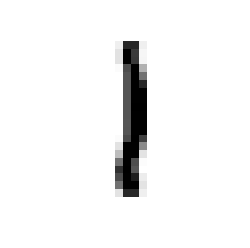

In [120]:
some_digit = X_train[0][:,10]

some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

## Model and tests

In [121]:
n_dim = 784

In [122]:
import tensorflow as tf

In [123]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [1, None])
learning_rate = tf.placeholder(tf.float32, shape=())

#W = tf.Variable(tf.zeros([1, n_dim]))
W = tf.Variable(tf.random_normal([1, n_dim], stddev= 2.0 / np.sqrt(2.0*n_dim))) 
b = tf.Variable(tf.zeros(1))



In [124]:
y_ = tf.sigmoid(tf.matmul(W,X)+b)
cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
#training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
training_step = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8).minimize(cost)

init = tf.global_variables_initializer()

In [125]:
def run_logistic_model(learning_r, training_epochs, train_obs, train_labels, debug = False):
    sess = tf.Session()
    sess.run(init)
    
    cost_history = np.empty(shape=[0], dtype = float)

    for epoch in range(training_epochs+1):
        
        sess.run(training_step, feed_dict = {X: train_obs, Y: train_labels, learning_rate: learning_r})

        cost_ = sess.run(cost, feed_dict={ X:train_obs, Y: train_labels, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)
        
        if (epoch % 200 == 0) & debug:
            print("Reached epoch",epoch,"cost J =", str.format('{0:.6f}', cost_))
            
    return sess, cost_history

In [126]:
sess, cost_history = run_logistic_model(learning_r = 5e-4, 
                                training_epochs = 600, 
                                train_obs = X_train[1], 
                                train_labels = y_train[1], 
                                debug = True)

Reached epoch 0 cost J = 0.627342
Reached epoch 200 cost J = 0.144844
Reached epoch 400 cost J = 0.085227
Reached epoch 600 cost J = 0.062180


In [127]:
correct_prediction=tf.equal(tf.greater(y_, 0.5), tf.equal(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Train accuracy:',sess.run(accuracy, feed_dict={X:X_train_, Y: y_train_, learning_rate: 0.01}))


NameError: name 'X_train_' is not defined

In [133]:
train_acc = []
dev_acc = []


for i in range (1): #foldnumber):
    
    # Prepare the folds
    lis = []
    ylis = []
    for k in np.delete(np.arange(foldnumber), i):
        lis.append(X_train[k])
        ylis.append(y_train[k])
        X_train_ = np.concatenate(lis, axis = 1)
        y_train_ = np.concatenate(ylis, axis = 1)
    X_train_ = np.asarray(X_train_)
    y_train_ = np.asarray(y_train_)
    
    X_dev_ = X_train[i]
    y_dev_ = y_train[i]
    
    print('Dev fold is', i)
    sess, cost_history = run_logistic_model(learning_r = 5e-4, 
                                training_epochs = 600, 
                                train_obs = X_train_, 
                                train_labels = y_train_, 
                                debug = True)
    
    correct_prediction=tf.equal(tf.greater(y_, 0.5), tf.equal(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Train accuracy:',sess.run(accuracy, feed_dict={X:X_train_, Y: y_train_, learning_rate: 5e-4}))
    train_acc = np.append( train_acc, sess.run(accuracy, feed_dict={X:X_train_, Y: y_train_, learning_rate: 5e-4}))

    
    correct_prediction=tf.equal(tf.greater(y_, 0.5), tf.equal(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Dev accuracy:',sess.run(accuracy, feed_dict={X:X_dev_, Y: y_dev_, learning_rate: 5e-4}))
    dev_acc = np.append( dev_acc, sess.run(accuracy, feed_dict={X:X_dev_, Y: y_dev_, learning_rate: 5e-4}))
    
    #sess.close()

    


Dev fold is 0
Reached epoch 0 cost J = 0.746164
Reached epoch 200 cost J = 0.164582
Reached epoch 400 cost J = 0.098671
Reached epoch 600 cost J = 0.074406
Train accuracy: 0.986541
Dev accuracy: 0.986541


In [135]:
np.max(train_acc)

0.9865410327911377

In [136]:
np.max(dev_acc)

0.9865410327911377

In [446]:
train_std = np.std(train_acc)
dev_std = np.std(dev_acc)

train_avg = np.average(train_acc)
dev_avg = np.average(dev_acc)

print('train std-dev', train_std)
print('dev std-dev',dev_std)

print('trian avg',train_avg)
print('dev avg',dev_avg)

print(dev_std / train_std)

train std-dev 0.000544139818711
dev std-dev 0.00242634155369
trian avg 0.986675632
dev avg 0.986541050673
4.45904061835


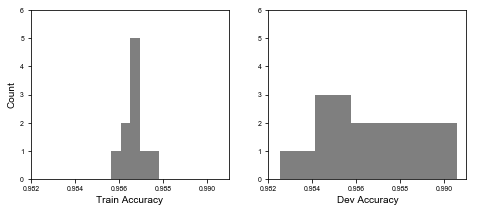

In [435]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(7.8, 3.1))
ax = fig.add_subplot(1, 2, 1)
plt.hist(train_acc, bins = 5, color = 'black', alpha = 0.5)
ax.set_ylim(0,6)
ax.set_xlim(0.982,0.991)
ax.set_xlabel('Train Accuracy')
ax.set_ylabel('Count')

ax = fig.add_subplot(1, 2, 2)
ax.set_ylim(0,6)
ax.set_xlim(0.982,0.991)
plt.hist(dev_acc, bins = 5, color = 'black', alpha = 0.5)
ax.set_xlabel('Dev Accuracy')

fig.savefig('Figure_6-9'+'.png', format='png', dpi=300,bbox_inches='tight')

In [113]:
sess, cost_history = run_logistic_model(learning_r = 0.01, 
                                training_epochs = 50, 
                                train_obs = Xtrain, 
                                train_labels = ytrain, 
                                debug = False)

Reached epoch 0 cost J = 0.639773
Reached epoch 10 cost J = 0.412214
Reached epoch 20 cost J = 0.349503
Reached epoch 30 cost J = 0.317864
Reached epoch 40 cost J = 0.295897
Reached epoch 50 cost J = 0.278217
Reached epoch 60 cost J = 0.263053
Reached epoch 70 cost J = 0.249695
Reached epoch 80 cost J = 0.237795
Reached epoch 90 cost J = 0.227135
Reached epoch 100 cost J = 0.217555


# Let's check the distribution if we create a dev dataset

In [96]:
np.random.seed(42)
rnd = np.random.rand(len(yinput)) < 0.8

train_y = yinput[rnd]
dev_y = yinput[~rnd]

print(train_y.shape)
print(dev_y.shape)

(56056,)
(13944,)


Note: datasets loaded by scikit-learn have a dictionary structure. 

- a DESCR structure describing the dataset
- a ```data``` key containing an array with one row per instance and one column per feature
- a ```target``` with an array with the labels

we have 70000 digits available, from 0 to 9. Let's define a helper function that will allow us to visualize the digits.

In [97]:
total = 0
for i in range(10):
    print ("digit", i, "makes", np.around(np.count_nonzero(train_y == i)/56056.0*100.0, decimals=1), "% of the 56056 observations")

digit 0 makes 9.9 % of the 56056 observations
digit 1 makes 11.3 % of the 56056 observations
digit 2 makes 9.9 % of the 56056 observations
digit 3 makes 10.1 % of the 56056 observations
digit 4 makes 9.8 % of the 56056 observations
digit 5 makes 9.0 % of the 56056 observations
digit 6 makes 9.8 % of the 56056 observations
digit 7 makes 10.4 % of the 56056 observations
digit 8 makes 9.8 % of the 56056 observations
digit 9 makes 9.9 % of the 56056 observations


# Case for splitting with 1vsall

In [98]:
y_ = np.zeros_like(yinput)
y_[np.any([yinput == 0], axis = 0)] = 0
y_[np.any([yinput > 0], axis = 0)] = 1

In [99]:
Xinput.shape

(70000, 784)

In [100]:
np.random.seed(42)
rnd = np.random.rand(len(y_)) < 0.8

X_train = Xinput[rnd,:]
y_train = y_[rnd]
X_dev = Xinput[~rnd,:]
y_dev = y_[~rnd]


In [126]:
y_dev.shape

(13944,)

In [103]:
total = 0
for i in range(2):
    print ("class", i, "makes", np.around(np.count_nonzero(y_train == i)/56056.0*100.0, decimals=1), "% of the 56056 observations")

class 0 makes 9.9 % of the 56056 observations
class 1 makes 90.1 % of the 56056 observations


In [127]:
total = 0
for i in range(2):
    print ("class", i, "makes", np.around(np.count_nonzero(y_dev == i)/13944.0*100.0, decimals=1), "% of the 13944 observations")

class 0 makes 9.7 % of the 13944 observations
class 1 makes 90.3 % of the 13944 observations


In [104]:
total = 0
for i in range(2):
    print ("class", i, "appears", np.count_nonzero(y_train == i), " times")

class 0 appears 5547  times
class 1 appears 50509  times


## Normalisation

Let's normalise our data. The pixel will have a value between 0 and 255 (gray values). Let's normalise the value between 0 and 1.

In [105]:
X_train_normalised = X_train/255.0
X_dev_normalised = X_dev/255.0

Remember that we need features along the rows, and training cases along the columns. So let's reshape our dataset

In [106]:
X_train_tr = X_train_normalised.transpose()
y_train_tr = y_train.reshape(1,y_train.shape[0])

X_dev_tr = X_dev_normalised.transpose()
y_dev_tr = y_dev.reshape(1,y_dev.shape[0])


n_dim = X_train_tr.shape[0]
dim_train = X_train_tr.shape[1]
dim_dev = X_dev_tr.shape[1]



We will need to rescale our lables. Remember we will compare them in the cost function with 0 and 1 (proabilities) and therefore our class labels must be 0 and 1, not 1 and 2. So the following step take care of it.

In [107]:
Xtrain = X_train_tr
ytrain = y_train_tr

Xdev = X_dev_tr
ydev = y_dev_tr

In [122]:
ydev.shape

(1, 13944)

In [ ]:
Xdev.shape

# Tensorflow Implementation

In [95]:
import tensorflow as tf

In [96]:
print(Xtrain.shape)
print(ytrain.shape)

NameError: name 'Xtrain' is not defined

In [ ]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [1, None])
learning_rate = tf.placeholder(tf.float32, shape=())

W = tf.Variable(tf.zeros([1, n_dim]))
b = tf.Variable(tf.zeros(1))

init = tf.global_variables_initializer()

In [ ]:
y_ = tf.sigmoid(tf.matmul(W,X)+b)
cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [ ]:
def run_logistic_model(learning_r, training_epochs, train_obs, train_labels, debug = False):
    sess = tf.Session()
    sess.run(init)
    
    cost_history = np.empty(shape=[0], dtype = float)

    for epoch in range(training_epochs+1):
        
        sess.run(training_step, feed_dict = {X: train_obs, Y: train_labels, learning_rate: learning_r})

        cost_ = sess.run(cost, feed_dict={ X:train_obs, Y: train_labels, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)
        
        if (epoch % 10 == 0) & debug:
            print("Reached epoch",epoch,"cost J =", str.format('{0:.6f}', cost_))
            
    return sess, cost_history

In [ ]:
sess, cost_history = run_logistic_model(learning_r = 0.01, 
                                training_epochs = 100, 
                                train_obs = Xtrain, 
                                train_labels = ytrain, 
                                debug = True)

In [114]:
correct_prediction1=tf.equal(tf.greater(y_, 0.5), tf.equal(Y,1))
accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))
print(sess.run(accuracy1, feed_dict={X:Xtrain, Y: ytrain, learning_rate: 0.05}))

0.912694


In [115]:
from sklearn.metrics import confusion_matrix

In [116]:
pred_y.flatten().astype(int)

array([0, 0, 0, ..., 1, 1, 1])

In [129]:
ypred = sess.run(tf.greater(y_, 0.5), feed_dict={X:Xtrain, Y: ytrain, learning_rate: 0.05}).flatten().astype(int)
confusion_matrix(ytrain.flatten(), ypred)

array([[  659,  4888],
       [    6, 50503]], dtype=int64)

In [124]:
ypred = sess.run(tf.greater(y_, 0.5), feed_dict={X:Xdev, Y: ydev, learning_rate: 0.05}).flatten().astype(int)
confusion_matrix(ydev.flatten(), ypred)

array([[  150,  1206],
       [    2, 12586]], dtype=int64)

In [125]:
correct_prediction1=tf.equal(tf.greater(y_, 0.5), tf.equal(Y,1))
accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))
print(sess.run(accuracy1, feed_dict={X:Xdev, Y: ydev, learning_rate: 0.05}))

0.913368


## Weight analysis

In [138]:
ww = sess.run(W, feed_dict={X:X_train[1], Y: y_train[1], learning_rate: 0.05})

In [200]:
sess.run(b, feed_dict={X:X_train[1], Y: y_train[1], learning_rate: 0.05})

array([-0.16495524], dtype=float32)

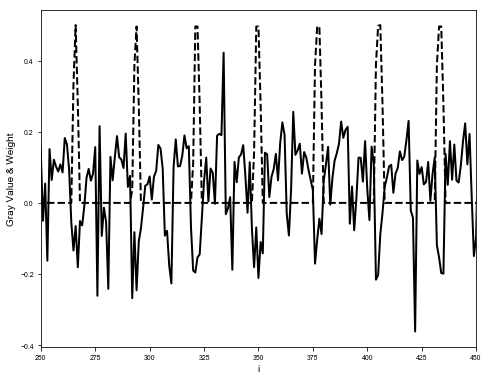

In [201]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(7.8, 6.2))
ax = fig.add_subplot(1, 1, 1)
#plt.bar(x=np.arange(0,784,1),height=ww[0], color = 'black', alpha = 0.5, width = 5.0)
#plt.bar(x=np.arange(0,784,1),height=Xinputfold[0][76,:]/2.0/255.0, color = 'black', alpha = 0.1, 
#        width = 5.0, hatch='//', linewidth=2)

plt.plot(np.arange(0,784,1), Xinputfold[0][76,:]/2.0/255.0, color = 'black' , linewidth = 2, ls = 'dashed')

plt.plot(np.arange(0,784,1), ww[0], color = 'black' , linewidth = 2, alpha = 1.0)

#ax.set_ylim(0,6)
ax.set_xlim(250, 450)
ax.set_xlabel('i')
ax.set_ylabel('Gray Value & Weight')

fig.savefig('Figure_6-15'+'.png', format='png', dpi=300,bbox_inches='tight')

# Figure 6-17 (w*x)

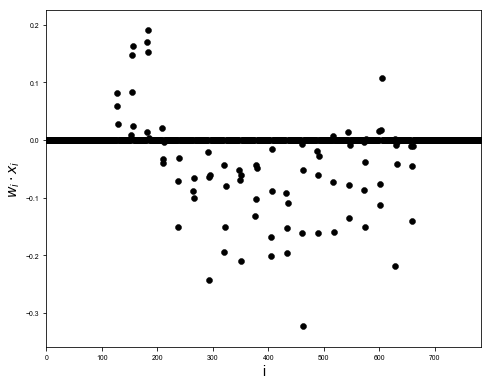

In [220]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(7.8, 6.2))
ax = fig.add_subplot(1, 1, 1)
#plt.bar(x=np.arange(0,784,1),height=ww[0], color = 'black', alpha = 0.5, width = 5.0)
#plt.bar(x=np.arange(0,784,1),height=Xinputfold[0][76,:]/2.0/255.0, color = 'black', alpha = 0.1, 
#        width = 5.0, hatch='//', linewidth=2)

plt.scatter(np.arange(0,784,1), np.multiply(Xinputfold[0][76,:]/255.0, ww[0]), color = 'black' , 
            linewidth = 0.5)

#plt.plot(np.arange(0,784,1), ww[0], color = 'black' , linewidth = 2, alpha = 1.0)
ax.axhline(0, color = 'black', linewidth = 2, ls = '--')


#ax.set_ylim(0,6)
ax.set_xlim(0, 784)
ax.set_xlabel('i', fontsize = 14)
ax.set_ylabel(r'$w_i \cdot x_i$', fontsize = 14)

fig.savefig('Figure_6-17'+'.png', format='png', dpi=300,bbox_inches='tight')

## Figure 6-11

For Figure 6-11 I used image 76.

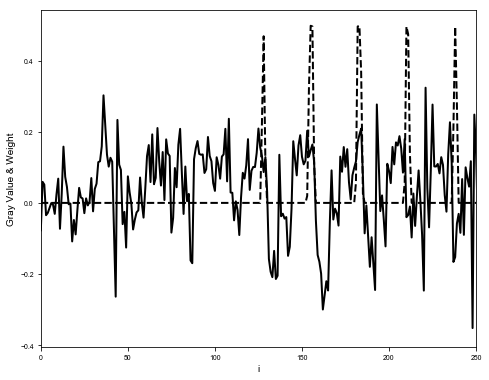

In [199]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(7.8, 6.2))
ax = fig.add_subplot(1, 1, 1)
#plt.bar(x=np.arange(0,784,1),height=ww[0], color = 'black', alpha = 0.5, width = 5.0)
#plt.bar(x=np.arange(0,784,1),height=Xinputfold[0][76,:]/2.0/255.0, color = 'black', alpha = 0.1, 
#        width = 5.0, hatch='//', linewidth=2)

plt.plot(np.arange(0,784,1), Xinputfold[0][76,:]/2.0/255.0, color = 'black' , linewidth = 2, ls = 'dashed')

plt.plot(np.arange(0,784,1), ww[0], color = 'black' , linewidth = 2, alpha = 1.0)

#ax.set_ylim(0,6)
ax.set_xlim(0, 250)
ax.set_xlabel('i')
ax.set_ylabel('Gray Value & Weight')

fig.savefig('Figure_6-X'+'.png', format='png', dpi=300,bbox_inches='tight')

# Manual data analysis

### Figure 6-11

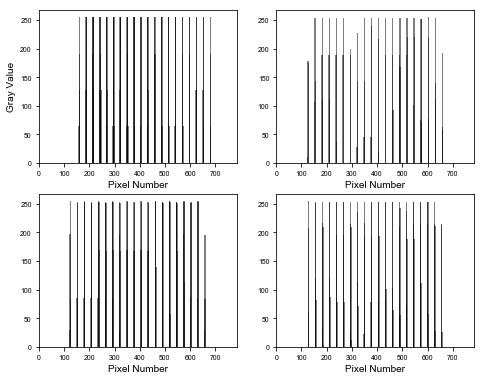

In [49]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(7.8, 6.2))
ax = fig.add_subplot(2, 2, 1)
plt.bar(x=np.arange(0,784,1),height=Xinputfold[0][555,:], color = 'black', alpha = 0.5, width = 5.0)
#ax.set_ylim(0,6)
ax.set_xlim(0, 784)
ax.set_xlabel('Pixel Number')
ax.set_ylabel('Gray Value')

ax = fig.add_subplot(2, 2, 2)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinputfold[0][879,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number')

ax = fig.add_subplot(2, 2, 3)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinputfold[0][78,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number')

ax = fig.add_subplot(2, 2, 4)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinputfold[0][111,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number')


fig.savefig('Figure_6-11'+'.png', format='png', dpi=300,bbox_inches='tight')

### Figure 6-10

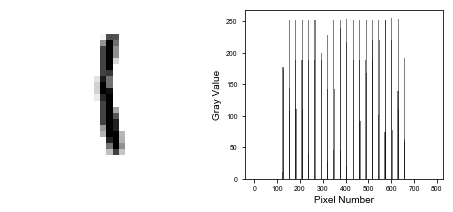

In [42]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(7.8, 3.1))
ax = fig.add_subplot(1, 2, 1)

some_digit = Xinputfold[0][879,:]
some_digit_image = some_digit.reshape(28,28)

ax.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")

ax = fig.add_subplot(1, 2, 2)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
plt.bar(x=np.arange(0,784,1),height=Xinputfold[0][879,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number')
ax.set_ylabel('Gray Value')



fig.savefig('Figure_6-10'+'.png', format='png', dpi=300,bbox_inches='tight')

### Figure 6-12

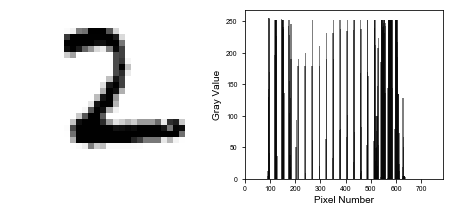

In [54]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(7.8, 3.1))
ax = fig.add_subplot(1, 2, 1)

some_digit = Xinputfold[0][76,:]
some_digit_image = some_digit.reshape(28,28)

ax.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")

ax = fig.add_subplot(1, 2, 2)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinputfold[0][76,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number')
ax.set_ylabel('Gray Value')



fig.savefig('Figure_6-12'+'.png', format='png', dpi=300,bbox_inches='tight')

### Figure 6-13

In [59]:
import matplotlib.patches as patches


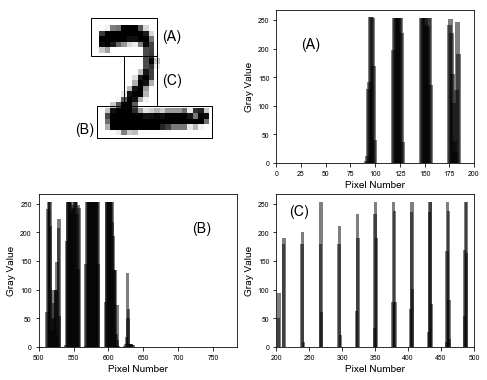

In [79]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(7.8, 6.2))
ax = fig.add_subplot(2, 2, 1)

some_digit = Xinputfold[0][76,:]
some_digit_image = some_digit.reshape(28,28)

ax.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")

ax.add_patch(
    patches.Rectangle(
        (5, 1),
        12,
        7,
        fill=False      # remove background
    )
)
ax.text(18,5,'(A)', fontsize = 14)

ax.add_patch(
    patches.Rectangle(
        (11, 8),
        6,
        9,
        fill=False      # remove background
    )
)
ax.text(18,13,'(C)', fontsize = 14)


ax.add_patch(
    patches.Rectangle(
        (6, 17),
        21,
        6,
        fill=False      # remove background
    )
)
ax.text(2,22,'(B)', fontsize = 14)


ax = fig.add_subplot(2, 2, 2)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 200)
plt.bar(x=np.arange(0,784,1),height=Xinputfold[0][76,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number')
ax.set_ylabel('Gray Value')
ax.text(25,200,'(A)', fontsize = 14)

ax = fig.add_subplot(2, 2, 3)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(500, 784)
plt.bar(x=np.arange(0,784,1),height=Xinputfold[0][76,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number')
ax.set_ylabel('Gray Value')
ax.text(720,200,'(B)', fontsize = 14)

ax = fig.add_subplot(2, 2, 4)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(200, 500)
plt.bar(x=np.arange(0,784,1),height=Xinputfold[0][76,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number')
ax.set_ylabel('Gray Value')
ax.text(220,230,'(C)', fontsize = 14)




fig.savefig('Figure_6-13'+'.png', format='png', dpi=300,bbox_inches='tight')

### Figure 6-14

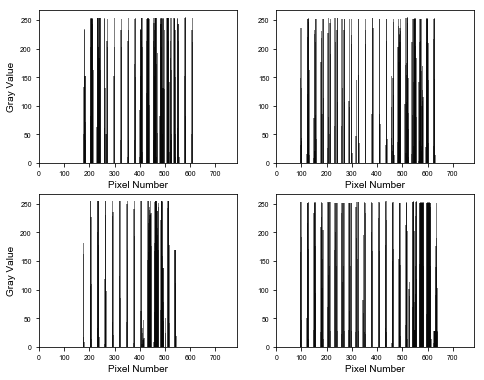

In [91]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(7.8, 6.2))
ax = fig.add_subplot(2, 2, 1)
plt.bar(x=np.arange(0,784,1),height=Xinputfold[0][1,:], color = 'black', alpha = 0.5, width = 5.0)
#ax.set_ylim(0,6)
ax.set_xlim(0, 784)
ax.set_xlabel('Pixel Number')
ax.set_ylabel('Gray Value')

ax = fig.add_subplot(2, 2, 2)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinputfold[0][4,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number')

ax = fig.add_subplot(2, 2, 3)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinputfold[0][10,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number')
ax.set_ylabel('Gray Value')

ax = fig.add_subplot(2, 2, 4)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinputfold[0][45,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number')


fig.savefig('Figure_6-14'+'.png', format='png', dpi=300,bbox_inches='tight')

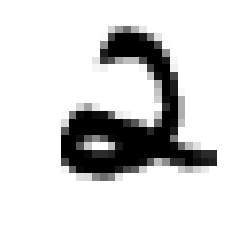

In [192]:
some_digit = Xinputfold[0][19,:]

some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

## some_digit = Xinputfold[0][111,:]

some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()